# ***Credit Card Fraud Detection using ML***



1.  Import Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE

2. Load Dataset

In [ ]:
df=pd.read_csv('/content/creditcard.csv')

In [ ]:
# Drop missing values if any
df.dropna(inplace=True)

In [ ]:
#Check for nulls
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [ ]:
print(df.head())
print(df['Class'].value_counts())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

 3.Preprocessing

In [ ]:
# Standardize 'Amount' and drop 'Time' if present
if 'Amount' in df.columns:
    df['Amount'] = StandardScaler().fit_transform(df[['Amount']])
if 'Time' in df.columns:
    df.drop('Time', axis=1, inplace=True)

# Features and target
X = df.drop('Class', axis=1)
y = df['Class']


4. Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


5. Handle Imbalance with SMOTE

In [ ]:
 #Handle Imbalanced Data using SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)


6. Train ML Models

Logistic Regression AND  Random Forest

In [ ]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_res, y_train_res)
y_pred_lr = lr.predict(X_test)

# Random Forest (optimized)
rf = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
rf.fit(X_train_res[:20000], y_train_res[:20000])  # Speed up training
y_pred_rf = rf.predict(X_test)


7. Evaluate Models

In [ ]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n {model_name} Results:")
    print(confusion_matrix(y_true, y_pred))
    print(classification_report(y_true, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_true, y_pred))

In [ ]:
evaluate_model(y_test, y_pred_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")


 Logistic Regression Results:
[[55355  1509]
 [    8    90]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.98     56962

ROC AUC Score: 0.9459151731880147

 Random Forest Results:
[[56854    10]
 [   26    72]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.73      0.80        98

    accuracy                           1.00     56962
   macro avg       0.94      0.87      0.90     56962
weighted avg       1.00      1.00      1.00     56962

ROC AUC Score: 0.8672590096815316


8. Visualize Confusion Matrix

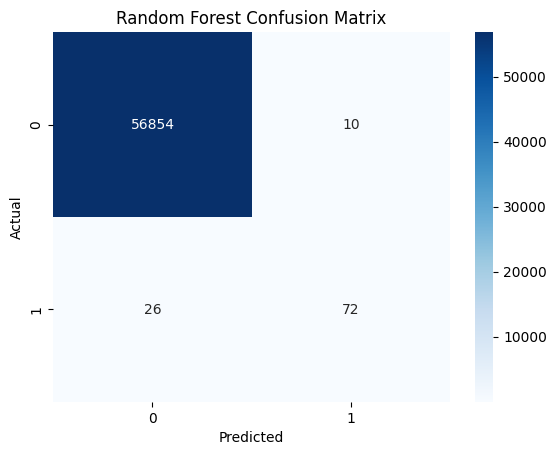

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
# Simulate a new transaction (using any existing one)
new_data = X.iloc[100].values.reshape(1, -1)
# Predict using Logistic Regression
lr_result = lr.predict(new_data)
print("Logistic Regression:", "Fraud" if lr_result[0] == 1 else "Legit")
rf_result = rf.predict(new_data)
print("Random Forest:", "Fraud" if rf_result[0] == 1 else "Legit")

Logistic Regression: Legit
Random Forest: Legit


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Manually create a new fraudulent transaction
# Example: [Time, V1, V2, ..., V28, Amount]
new_fraud_data = np.array([0, 1.2, 0.5, -1.1, 0.9, 0.6, 0.4, -1.2, 0.8, 0.7, 1.1, -0.6, 0.3, -0.5, 1.0, 0.4, -1.0, -0.3, 0.6, 0.1, 0.8, -0.7, -1.3, 0.9, 1.2, 0.5, 0.2, -0.4, 50.0])
new_fraud_data = new_fraud_data.reshape(1, -1)
# Predict with Logistic Regression
lr_result = lr.predict(new_fraud_data)
print("Logistic Regression:", "Fraud" if lr_result[0] == 1 else "Legit")
# Predict with Random Forest
rf_result = rf.predict(new_fraud_data)
print("Random Forest:", "Fraud" if rf_result[0] == 1 else "Legit")


Logistic Regression: Fraud
Random Forest: Legit


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


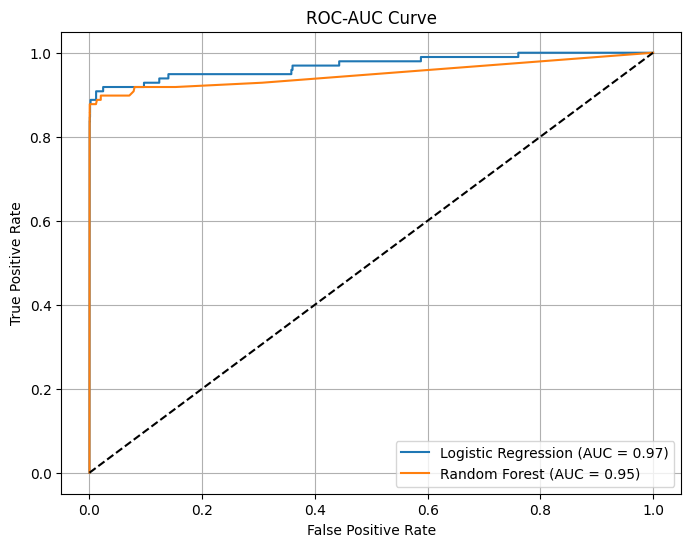

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities
lr_probs = lr.predict_proba(X_test)[:, 1]
rf_probs = rf.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_probs)
roc_auc_lr = auc(fpr_lr, tpr_lr)

fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def print_metrics(y_true, y_pred, model_name):
    print(f"\n {model_name} Metrics")
    print(f"Accuracy : {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall   : {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score : {f1_score(y_true, y_pred):.4f}")

# Predictions
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)

# Evaluate both models
print_metrics(y_test, y_pred_lr, "Logistic Regression")
print_metrics(y_test, y_pred_rf, "Random Forest")



 Logistic Regression Metrics
Accuracy : 0.9734
Precision: 0.0563
Recall   : 0.9184
F1 Score : 0.1061

 Random Forest Metrics
Accuracy : 0.9994
Precision: 0.8780
Recall   : 0.7347
F1 Score : 0.8000
